<a href="https://colab.research.google.com/github/computacao-aplicada/lab01-intro-P3dr7/blob/main/atv01_mario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01: Introdução à Visão Computacional e Computação Gráfica

### 🎯 Objetivos da Aula
- Compreender o que é Visão Computacional.
- Diferenciar Visão Computacional, Processamento de Imagens e Computação Gráfica.
- Realizar manipulações simples com imagens.
- Explorar conceitos de pixels, resoluções e canais de cor.


## O que é Visão Computacional?

A **Visão Computacional** é uma área da Inteligência Artificial que busca permitir que os computadores 'vejam' e interpretem o mundo visual, assim como os humanos.

Ela utiliza imagens e vídeos como entrada e tenta extrair informações úteis, como:
- Detecção de objetos
- Reconhecimento facial
- Segmentação de imagem
- Rastreamento de movimento

A **Computação Gráfica**, por outro lado, está mais voltada à geração de imagens — como renderizar cenas em 3D.

Já o **Processamento de Imagens** se concentra na transformação e análise de imagens (normalmente 2D) para melhorar a qualidade ou extrair características.

| Área                  | Foco                             |
|-----------------------|----------------------------------|
| Visão Computacional   | Entendimento e interpretação     |
| Computação Gráfica    | Geração de imagens               |
| Processamento de Imagens | Manipulação e melhoria de imagens |


In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Exibir gráficos inline
%matplotlib inline


## Exemplo prático: Carregar e visualizar uma imagem

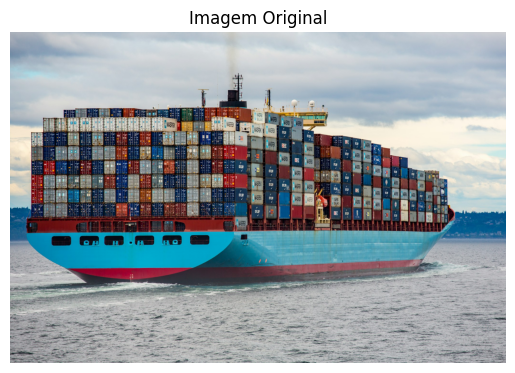

In [ ]:
# Carregar imagem de exemplo
from PIL import Image
import requests

url = "https://images.unsplash.com/photo-1605745341112-85968b19335b?q=80&w=2071&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
image = Image.open(requests.get(url, stream=True).raw)
image = image.convert("RGB")  # Garante 3 canais

# Mostrar imagem
plt.imshow(image)
plt.title("Imagem Original")
plt.axis('off')
plt.show()


## Manipulação dos canais RGB

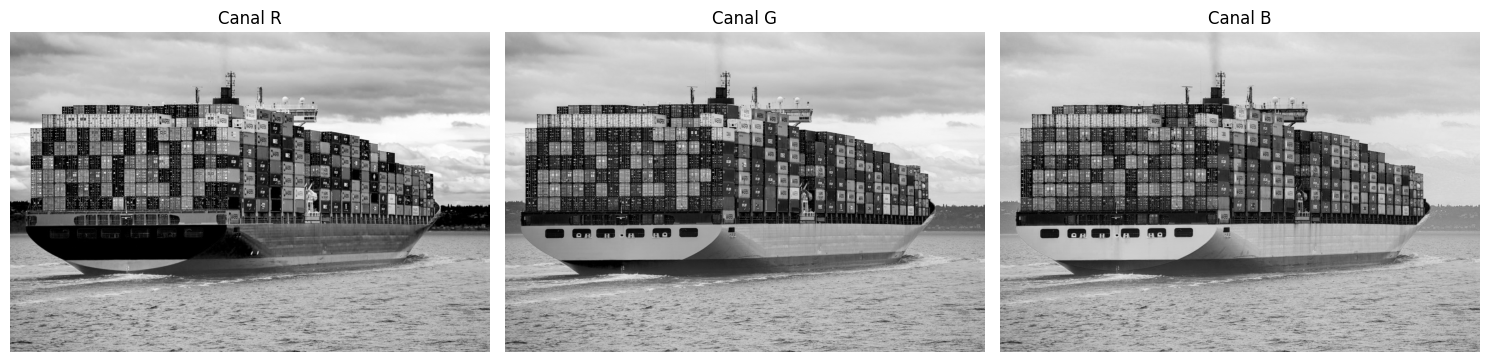

In [ ]:
# Separar os canais
r, g, b = image.split()

# Exibir os canais
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, channel, color in zip(axs, [r, g, b], ['R', 'G', 'B']):
    ax.imshow(channel, cmap='gray')
    ax.set_title(f'Canal {color}')
    ax.axis('off')
plt.tight_layout()
plt.show()


## Conversão para escala de cinza

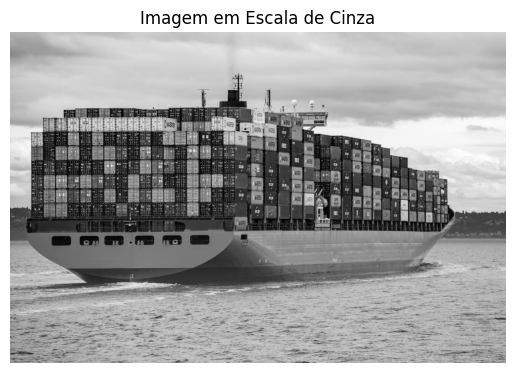

In [ ]:
# Converter para escala de cinza
gray_image = image.convert("L")

# Mostrar imagem em tons de cinza
plt.imshow(gray_image, cmap='gray')
plt.title("Imagem em Escala de Cinza")
plt.axis('off')
plt.show()


## Explorando os pixels

In [ ]:
# Converter para numpy e mostrar valor de alguns pixels
np_image = np.array(image)
print("Formato da imagem:", np_image.shape)
print("Valor do pixel (0, 0):", np_image[0, 0])


Formato da imagem: (1381, 2071, 3)
Valor do pixel (0, 0): [173 177 188]


## 🧠 Exercício

Tente modificar o código acima para:

- Exibir apenas o canal vermelho da imagem.
- Modifique aleatoriamente o canal vermelho e gere a imagem novamente.
- Criar uma imagem negativa (inverter as cores).
- Salvar uma nova imagem modificada no disco.
- Recorte um pedaço da imagem e salve em disco.

---
Cada um dos pontos do exercício deve ser uma célula separada!


# Canal Vermelho

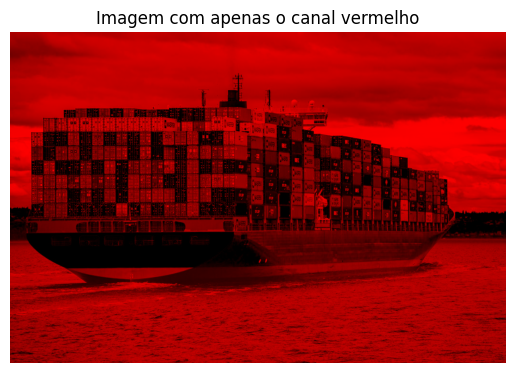

In [ ]:
zeros = g.point(lambda _: 0)  # mesma dimensão, mas tudo zero
only_red = Image.merge("RGB", (r, zeros, zeros))

# Exibir a imagem com apenas o canal vermelho
plt.imshow(only_red)
plt.title('Imagem com apenas o canal vermelho')
plt.axis('off')
plt.show()

# Modificacao aleatoria

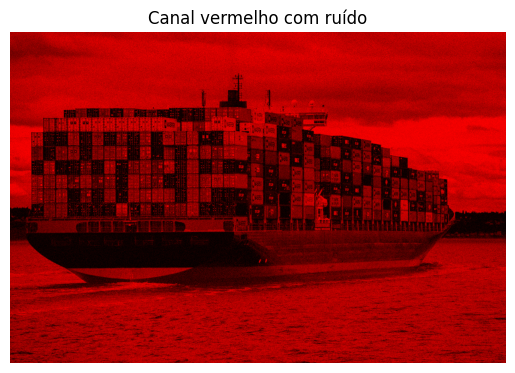

In [ ]:
# Converter canal vermelho original para array
r_array = np.array(r)

# Adicionar ruído aleatório
noise = np.random.randint(-50, 51, (height, width), dtype='int16')
r_modified = np.clip(r_array.astype('int16') + noise, 0, 255).astype('uint8')

# Transformar em imagem novamente
r_modified_img = Image.fromarray(r_modified)

# Combinar com G e B zerados
random_red_image = Image.merge("RGB", (r_modified_img, zeros, zeros))

# Exibir
plt.imshow(random_red_image)
plt.title('Canal vermelho com ruído')
plt.axis('off')
plt.show()



# Imagem Negativa

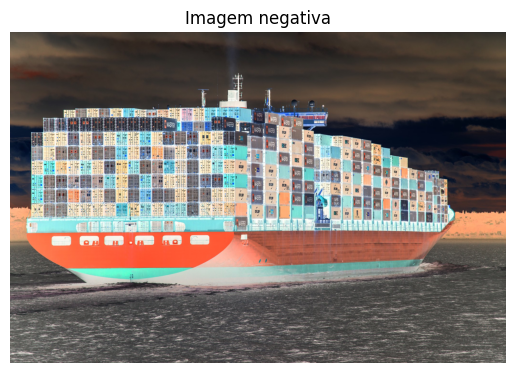

In [ ]:
# Inverter as cores da imagem
inverted_image = Image.fromarray(255 - np.array(image))

# Exibir
plt.imshow(inverted_image)
plt.title('Imagem negativa')
plt.axis('off')
plt.show()


# Salvar uma nova imagem modificada no disco

In [ ]:
inverted_image.save("imagem_negativa.jpg", format="JPEG")
print("Imagem negativa salva como 'imagem_negativa.jpg'.")

# Salvar a imagem com canal vermelho aleatório
random_red_image.save("imagem_vermelho_aleatorio.jpg", format="JPEG")
print("Imagem com vermelho aleatório salva como 'imagem_vermelho_aleatorio.jpg'.")

#  Recortar um pedaço da imagem e salvar no disco

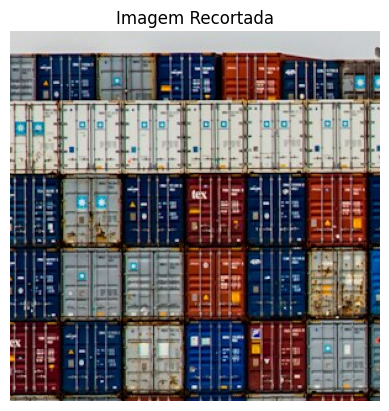

Imagem recortada salva como 'imagem_recortada.jpg'.


In [ ]:
box = (300, 300, 600, 600)  # ajuste conforme o necessário

# Recortar a imagem
cropped_image = image.crop(box)

# Visualizar a imagem recortada
plt.imshow(cropped_image)
plt.title('Imagem Recortada')
plt.axis('off')
plt.show()

# Salvar a imagem recortada
cropped_image.save("imagem_recortada.jpg")
print("Imagem recortada salva como 'imagem_recortada.jpg'.")